In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from acquire import get_zillow_data

In [2]:
df = get_zillow_data()

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (64) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [4]:
df = df[df.groupby('parcelid')['transactiondate'].transform('max') == df['transactiondate']]


In [5]:
df.shape

(77381, 68)

In [6]:
df.fips.value_counts()

6037.0    50551
6059.0    20593
6111.0     6237
Name: fips, dtype: int64

In [7]:
new_df = df[df['propertylandusedesc'].isin(['Single Family Residential', 'Manufactured, Modular, Prefabricated Homes', 'Townhouse', 'Mobile Home ' ])]

In [8]:
new_df.shape

(52384, 68)

In [9]:
new_df.fips.value_counts()

6037.0    33830
6059.0    14111
6111.0     4443
Name: fips, dtype: int64

In [10]:
def handle_missing_values(df, prop_required_column = .60, prop_required_row = .75):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [11]:
new_df = handle_missing_values(new_df)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
new_df.shape

(52290, 34)

In [13]:
new_df.fips.value_counts()

6037.0    33813
6059.0    14066
6111.0     4411
Name: fips, dtype: int64

In [14]:
def remove_columns(df, cols_to_remove):  
    df = df.drop(columns=cols_to_remove)
    return df

**Going to convert fips to county name and year built to age**

In [15]:
new_df.loc[(new_df.fips == 6037.0),'fips']='Los Angeles County'

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [16]:
new_df.loc[(new_df.fips == 6111.0),'fips']='Ventura County'

In [17]:
new_df.loc[(new_df.fips == 6059.0),'fips']='Orange County'

In [18]:
new_df.fips.value_counts()

Los Angeles County    33813
Orange County         14066
Ventura County         4411
Name: fips, dtype: int64

In [19]:
new_df['age'] = 2020 - new_df['yearbuilt']

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
new_df.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,age
0,1727539,14297519,3.5,4.0,NaN,3.5,3100.0,3100.0,Orange County,3.0,...,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,NaN,Single Family Residential,22.0
1,1387261,17052889,1.0,2.0,NaN,1.0,1465.0,1465.0,Ventura County,1.0,...,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,NaN,Single Family Residential,53.0
2,11677,14186244,2.0,3.0,NaN,2.0,1243.0,1243.0,Orange County,2.0,...,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,NaN,Single Family Residential,58.0
3,2288172,12177905,3.0,4.0,8.0,3.0,2376.0,2376.0,Los Angeles County,3.0,...,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Central,Single Family Residential,50.0
6,781532,12095076,3.0,4.0,9.0,3.0,2962.0,2962.0,Los Angeles County,3.0,...,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Central,Single Family Residential,70.0


Going to consolidate the taxvaluedollarcount and taxamount by creating a tax percentage column.

In [21]:
new_df['tax_percentage'] = round(new_df['taxamount'] / new_df['taxvaluedollarcnt'],4)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
new_df.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,age,tax_percentage
0,1727539,14297519,3.5,4.0,NaN,3.5,3100.0,3100.0,Orange County,3.0,...,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,NaN,Single Family Residential,22.0,0.0108
1,1387261,17052889,1.0,2.0,NaN,1.0,1465.0,1465.0,Ventura County,1.0,...,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,NaN,Single Family Residential,53.0,0.0122
2,11677,14186244,2.0,3.0,NaN,2.0,1243.0,1243.0,Orange County,2.0,...,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,NaN,Single Family Residential,58.0,0.0115
3,2288172,12177905,3.0,4.0,8.0,3.0,2376.0,2376.0,Los Angeles County,3.0,...,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Central,Single Family Residential,50.0,0.0122
6,781532,12095076,3.0,4.0,9.0,3.0,2962.0,2962.0,Los Angeles County,3.0,...,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Central,Single Family Residential,70.0,0.0123


In [23]:
new_df = new_df[new_df['bathroomcnt'] > 0]

In [24]:
new_df = new_df[new_df['bedroomcnt'] > 0]

In [25]:
new_df.fips.value_counts()

Los Angeles County    33758
Orange County         14060
Ventura County         4387
Name: fips, dtype: int64

In [26]:
new_df.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,age,tax_percentage
0,1727539,14297519,3.5,4.0,NaN,3.5,3100.0,3100.0,Orange County,3.0,...,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,NaN,Single Family Residential,22.0,0.0108
1,1387261,17052889,1.0,2.0,NaN,1.0,1465.0,1465.0,Ventura County,1.0,...,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,NaN,Single Family Residential,53.0,0.0122
2,11677,14186244,2.0,3.0,NaN,2.0,1243.0,1243.0,Orange County,2.0,...,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,NaN,Single Family Residential,58.0,0.0115
3,2288172,12177905,3.0,4.0,8.0,3.0,2376.0,2376.0,Los Angeles County,3.0,...,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Central,Single Family Residential,50.0,0.0122
6,781532,12095076,3.0,4.0,9.0,3.0,2962.0,2962.0,Los Angeles County,3.0,...,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Central,Single Family Residential,70.0,0.0123


In [27]:
new_df = remove_columns(new_df, ['id','parcelid', 'roomcnt', 'propertylandusedesc','finishedsquarefeet12', 'regionidzip', 'heatingorsystemdesc', 'unitcnt','censustractandblock','calculatedbathnbr','fullbathcnt', 'regionidcity' , 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt','propertycountylandusecode', 'propertylandusetypeid', 'regionidcounty' , 'assessmentyear', 'propertyzoningdesc','transactiondate','heatingorsystemtypeid', 'buildingqualitytypeid','yearbuilt', 'taxamount', 'taxvaluedollarcnt' ])

In [28]:
new_df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,logerror,age,tax_percentage
0,3.5,4.0,3100.0,Orange County,33634931.0,-117869207.0,4506.0,6.059063e+07,0.025595,22.0,0.0108
1,1.0,2.0,1465.0,Ventura County,34449266.0,-119281531.0,12647.0,6.111001e+07,0.055619,53.0,0.0122
2,2.0,3.0,1243.0,Orange County,33886168.0,-117823170.0,8432.0,6.059022e+07,0.005383,58.0,0.0115
3,3.0,4.0,2376.0,Los Angeles County,34245180.0,-118240722.0,13038.0,6.037300e+07,-0.103410,50.0,0.0122
6,3.0,4.0,2962.0,Los Angeles County,34145202.0,-118179824.0,63000.0,6.037461e+07,-0.001011,70.0,0.0123


In [29]:
dummy_df = pd.get_dummies(new_df['fips'])

In [30]:
new_df = pd.concat([new_df, dummy_df], axis=1)


In [31]:
new_df = new_df.drop(columns=['fips'])


**Going to split data before we impute values because imputed values will be calculated on training data**

In [32]:
# def split(df, target_var):
#     train_validate, test = train_test_split(df, test_size=.20, random_state=13)
#     train, validate = train_test_split(train_validate, test_size=.3, random_state=13)
    
#     X_train = train.drop(columns=[target_var])
#     y_train = train[[target_var]]

#     X_validate = validate.drop(columns=[target_var])
#     y_validate = validate[[target_var]]

#     X_test = test.drop(columns=[target_var])
#     y_test = test[[target_var]]
    
#     return X_train, y_train, X_validate, y_validate, X_test, y_test

In [33]:
# X_train, y_train, X_validate, y_validate, X_test, y_test = split(new_df, 'logerror')

**Search for columns with missing values, going to impute mean based on train**

**Columns w/ missing values**
- calculatedfinishedsquarefeet
- lotsizesquarefeet
- age
- tax_percentage

In [34]:
X_train['calculatedfinishedsquarefeet'].fillna(X_train.calculatedfinishedsquarefeet.mean(), inplace=True)

In [35]:
X_validate['calculatedfinishedsquarefeet'].fillna(X_train.calculatedfinishedsquarefeet.mean(), inplace=True)

In [36]:
X_test['calculatedfinishedsquarefeet'].fillna(X_train.calculatedfinishedsquarefeet.mean(), inplace=True)

In [37]:
X_train['lotsizesquarefeet'].fillna(X_train.lotsizesquarefeet.mean(), inplace=True)

In [38]:
X_validate['lotsizesquarefeet'].fillna(X_train.lotsizesquarefeet.mean(), inplace=True)

In [39]:
X_test['lotsizesquarefeet'].fillna(X_train.lotsizesquarefeet.mean(), inplace=True)

In [40]:
X_train['age'].fillna(X_train.age.mean(), inplace=True)

In [41]:
X_validate['age'].fillna(X_train.age.mean(), inplace=True)

In [42]:
X_test['age'].fillna(X_train.age.mean(), inplace=True)

In [43]:
X_train['tax_percentage'].fillna(X_train.tax_percentage.mean(), inplace=True)

In [44]:
X_validate['tax_percentage'].fillna(X_train.tax_percentage.mean(), inplace=True)

In [45]:
X_test['tax_percentage'].fillna(X_train.tax_percentage.mean(), inplace=True)

**All values have been imputed, no null values remaining**

# Scale

In [49]:
from sklearn.preprocessing import MinMaxScaler


In [50]:
# def scale_min_max():
#     scaler = MinMaxScaler(copy=True, feature_range=(0,1)).fit(X_train)

#     X_train_scaled = pd.DataFrame(scaler.transform(X_train), 
#                                   columns=X_train.columns.values).set_index([X_train.index.values])
    
#     X_validate_scaled = pd.DataFrame(scaler.transform(X_validate),
#                                     columns=X_validate.columns.values).set_index([X_validate.index.values])

#     X_test_scaled = pd.DataFrame(scaler.transform(X_test), 
#                                  columns=X_test.columns.values).set_index([X_test.index.values])
    
#     return X_train_scaled, X_validate_scaled, X_test_scaled

In [54]:
X_train_scaled, X_validate_scaled, X_test_scaled = scale_min_max()


In [56]:
X = X_train_scaled[['latitude', 'longitude', 'tax_percentage', 'age', 'calculatedfinishedsquarefeet']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
X_train['cluster'] = kmeans.labels_

In [57]:
pd.concat([
    X_train.groupby('cluster').mean(),
    X_train.groupby('cluster').size().rename('n_observations'),
], axis=1)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,age,tax_percentage,Los Angeles County,Orange County,Ventura County,n_observations
cluster,,,,,,,,,,,,,
0,2.625612,3.570329,2118.933170,3.455286e+07,-1.182069e+08,26059.900807,6.037848e+07,31.202759,0.016681,1.000000,0.000000,0.000000,2858
1,2.632479,3.565951,2212.483957,3.375135e+07,-1.178516e+08,7996.599741,6.055343e+07,42.420182,0.012167,0.172095,0.827905,0.000000,8658
2,2.610864,3.588192,2211.104201,3.422849e+07,-1.187392e+08,13079.007926,6.071105e+07,48.611751,0.012609,0.541181,0.000000,0.458819,5403
3,1.864231,2.952497,1554.194965,3.400609e+07,-1.181937e+08,8163.375668,6.038578e+07,75.692201,0.013742,0.946082,0.053837,0.000081,12315


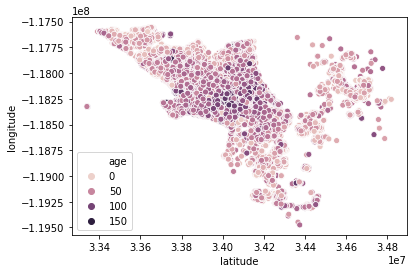

In [61]:
sns.scatterplot(data=X_train, x='latitude', y='longitude', hue='age' )

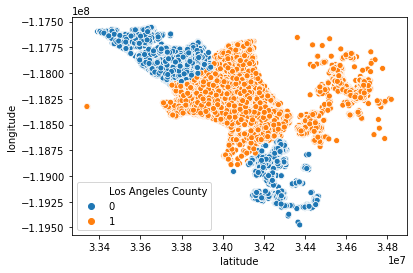

In [65]:
sns.scatterplot(data=X_train, x='latitude', y='longitude', hue='Los Angeles County' )

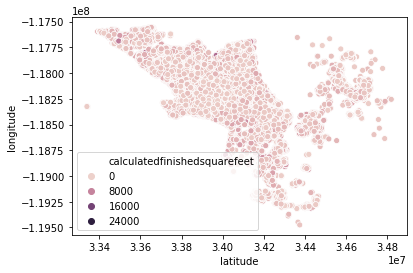

In [63]:
sns.scatterplot(data=X_train, x='latitude', y='longitude', hue='calculatedfinishedsquarefeet' )

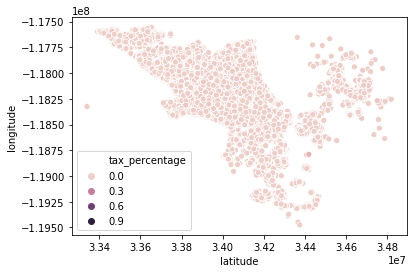

In [66]:
sns.scatterplot(data=X_train, x='latitude', y='longitude', hue='tax_percentage' )

In [67]:
kmeans.inertia_


1009.7179218843057

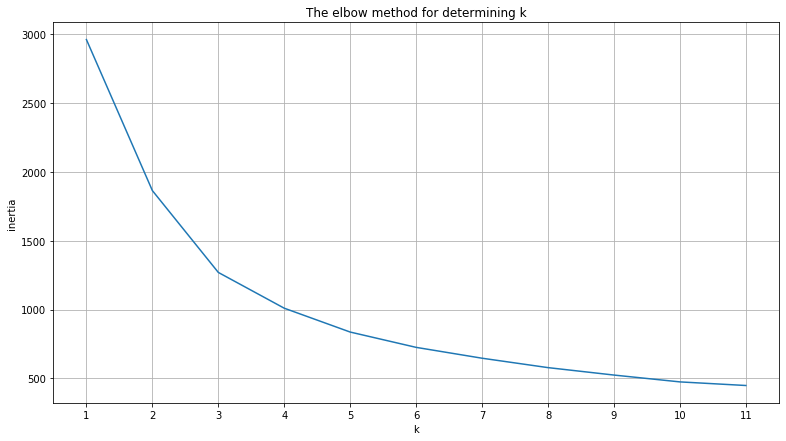

In [68]:

output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

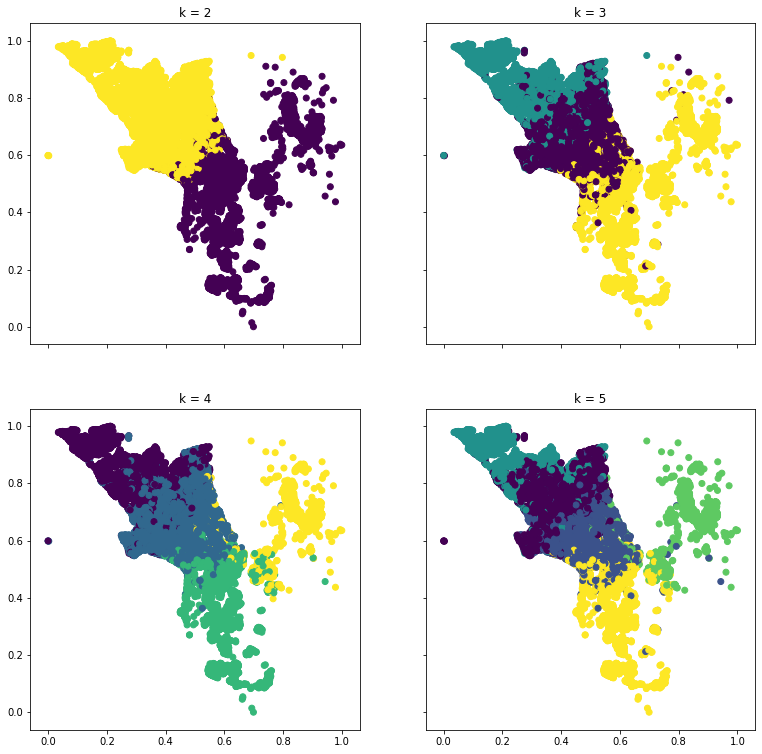

In [70]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.latitude, X.longitude, c=clusters)
    ax.set(title='k = {}'.format(k))

In [71]:
new_df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,logerror,age,tax_percentage,Los Angeles County,Orange County,Ventura County
0,3.5,4.0,3100.0,33634931.0,-117869207.0,4506.0,6.059063e+07,0.025595,22.0,0.0108,0,1,0
1,1.0,2.0,1465.0,34449266.0,-119281531.0,12647.0,6.111001e+07,0.055619,53.0,0.0122,0,0,1
2,2.0,3.0,1243.0,33886168.0,-117823170.0,8432.0,6.059022e+07,0.005383,58.0,0.0115,0,1,0
3,3.0,4.0,2376.0,34245180.0,-118240722.0,13038.0,6.037300e+07,-0.103410,50.0,0.0122,1,0,0
6,3.0,4.0,2962.0,34145202.0,-118179824.0,63000.0,6.037461e+07,-0.001011,70.0,0.0123,1,0,0


In [73]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52205 entries, 0 to 77578
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   52205 non-null  float64
 1   bedroomcnt                    52205 non-null  float64
 2   calculatedfinishedsquarefeet  52198 non-null  float64
 3   latitude                      52205 non-null  float64
 4   longitude                     52205 non-null  float64
 5   lotsizesquarefeet             51846 non-null  float64
 6   rawcensustractandblock        52205 non-null  float64
 7   logerror                      52205 non-null  float64
 8   age                           52170 non-null  float64
 9   tax_percentage                52200 non-null  float64
 10  Los Angeles County            52205 non-null  uint8  
 11  Orange County                 52205 non-null  uint8  
 12  Ventura County                52205 non-null  uint8  
dtypes

In [74]:
train_validate, test = train_test_split(new_df, train_size=.80, random_state=123)
train, validate = train_test_split(train_validate, random_state=123)

train.shape, validate.shape, test.shape

((31323, 13), (10441, 13), (10441, 13))

In [75]:
train['calculatedfinishedsquarefeet'].fillna(train.calculatedfinishedsquarefeet.mean(), inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [76]:
train['lotsizesquarefeet'].fillna(train.lotsizesquarefeet.mean(), inplace=True)

In [77]:
train['age'].fillna(train.age.mean(), inplace=True)

In [79]:
train['tax_percentage'].fillna(train['tax_percentage'].mean(), inplace=True)

In [80]:
# Scale the datasets
scaler = StandardScaler()
cols = train.drop(columns=["logerror"]).columns.tolist()

# .copy() makes a proper copy
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])


In [81]:
X = train_scaled[["tax_percentage", "age"]]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_
train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,logerror,age,tax_percentage,Los Angeles County,Orange County,Ventura County,cluster
26235,-0.302638,0.746800,-0.412251,-0.743914,0.367855,-0.045578,0.458964,0.037847,-0.020473,0.555064,-1.349775,1.644988,-0.303884,0
31607,-0.302638,0.746800,-0.333521,2.534685,0.147528,-0.060688,-0.554294,0.001643,-1.147217,1.199292,0.740864,-0.607907,-0.303884,1
15169,-0.302638,-0.327608,-0.633490,-0.734175,0.671064,-0.037397,0.457893,0.023312,0.369554,0.002868,-1.349775,1.644988,-0.303884,0
66322,-0.302638,-0.327608,0.053150,-0.988560,-0.592143,-0.009337,-0.565300,0.021750,0.152872,-0.286377,0.740864,-0.607907,-0.303884,0
21815,-0.302638,0.746800,-0.274723,-0.835555,0.311943,-0.041504,0.458959,0.027373,0.282881,0.278966,-1.349775,1.644988,-0.303884,0


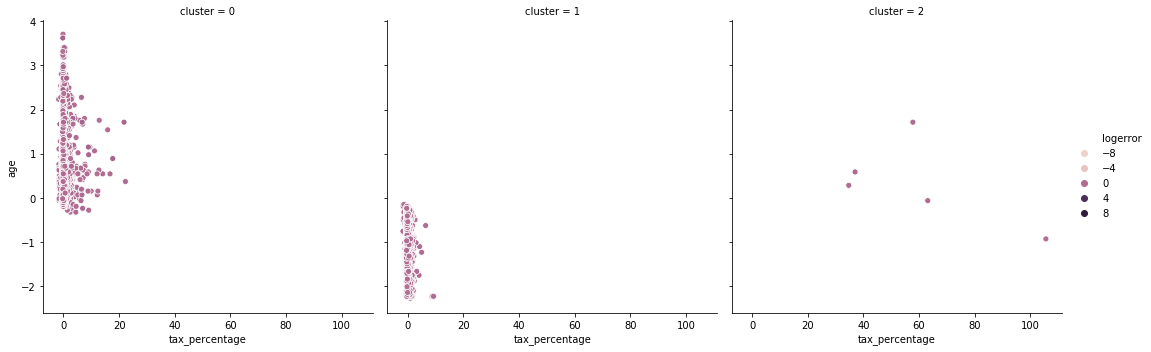

In [82]:
sns.relplot(x="tax_percentage", y="age", hue="logerror", col="cluster", data=train_scaled)


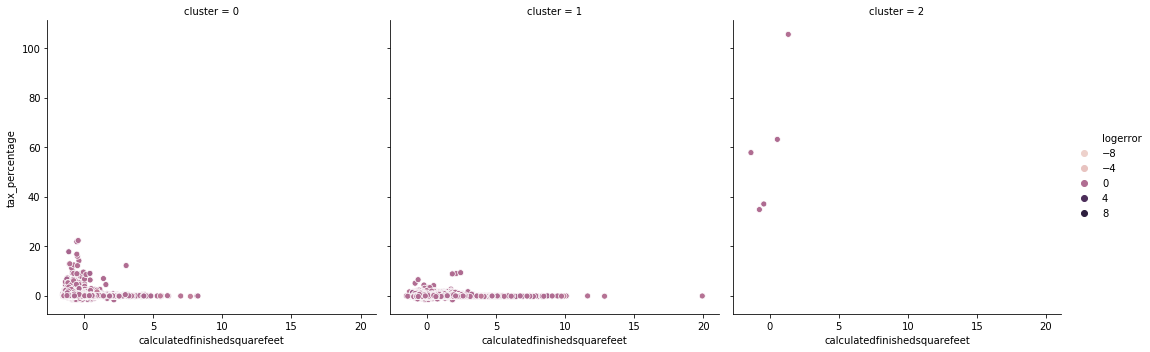

In [84]:
sns.relplot(x="calculatedfinishedsquarefeet", y="tax_percentage", hue="logerror", col="cluster", data=train_scaled)


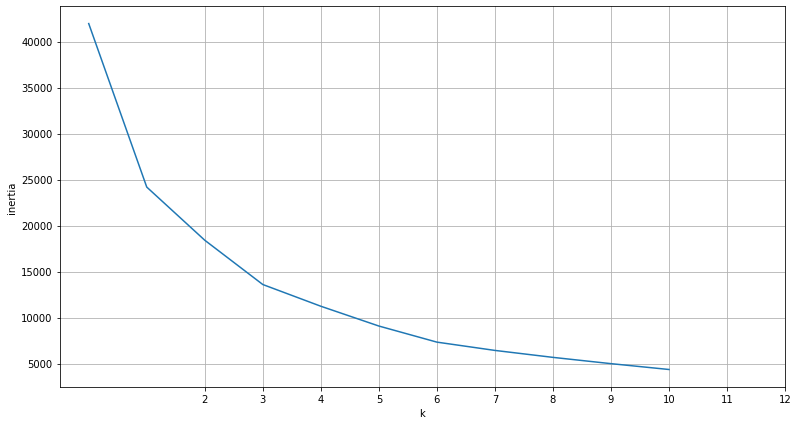

In [85]:
def get_inertia(k):
    return KMeans(k).fit(X).inertia_

plt.figure(figsize=(13, 7))

df = pd.Series([get_inertia(k) for k in range(2, 13)]).plot()

plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()


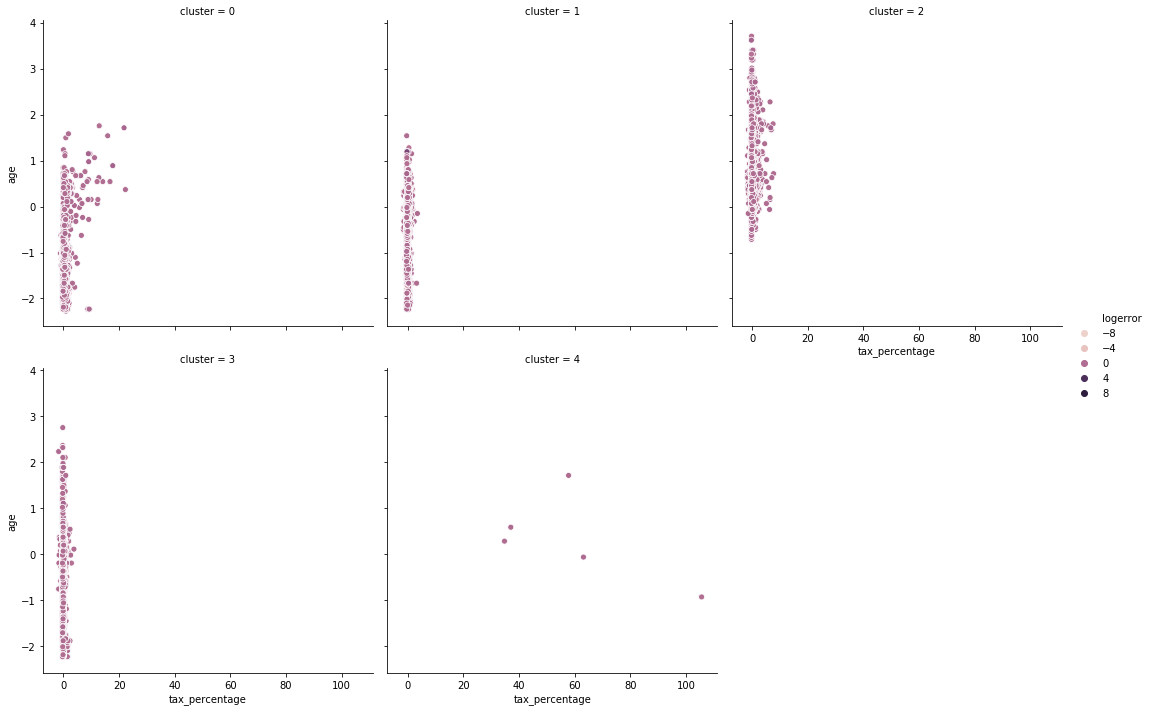

In [87]:
# Fit K-Means
X = train_scaled[["latitude", "longitude", "tax_percentage", "age"]]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_

# visualize w/ hue="species" style="cluster"
sns.relplot(x="tax_percentage", y="age", hue="logerror", col="cluster", col_wrap=3, data=train_scaled)